In [114]:
import pandas as pd# 读取 CSV 文件
file_path = "/home/dongzhi/毕设/data/taobao/taobao.csv"
columns = ['user_id', 'item_id', 'behavior', 'user_geohash', 'item_category', 'time']
df = pd.read_csv(file_path)
print(len(df))

# 删除 'user_geohash' 列
df = df.drop(columns=['user_geohash'])

# 删除缺失值
df = df.dropna()

# 先去重：对于 (user_id, item_id, behavior) 只保留最新的 time 记录
df = df.sort_values(by="time", ascending=False)  # 按时间降序
df = df.drop_duplicates(subset=["user_id", "item_id", "behavior_type"], keep="first")
print(len(df))

# 存储最终筛选后的数据（可选）
# df.to_csv("/home/dongzhi/毕设/data/taobao/filtered_taobao.csv", index=False)

553908


KeyError: "['user_geohash'] not found in axis"

In [117]:
import pandas as pd

# 读取 CSV 文件
file_path = '/home/dongzhi/毕设/data/filtered_data.csv'
columns = ['user_id', 'item_id', 'item_category', 'behavior', 'time']
data = pd.read_csv(file_path,header=None,names=columns)

# 查看数据的基本信息
print("数据集的前几行：")
print(data.head())

# 获取用户数量、商品数量、商品种类数量
num_users = data['user_id'].nunique()  # 假设用户列名为 'user_id'
num_items = data['item_id'].nunique()  # 假设商品列名为 'item_id'
num_categories = data['item_category'].nunique()  # 假设商品种类列名为 'category_id'
behavior_counts = data['behavior'].value_counts().to_dict()
# 获取 4 种行为的数量
num_pv = behavior_counts.get('pv', 0)           # 浏览
num_fav = behavior_counts.get('fav', 0)         # 收藏
num_cart = behavior_counts.get('cart', 0)       # 加购
num_buy = behavior_counts.get('buy', 0)   # 假设行为列名为 'purchase'

# 输出结果
print(f"用户数量: {num_users}")
print(f"商品数量: {num_items}")
print(f"商品种类数量: {num_categories}")
print(f"浏览数量: {num_pv}")
print(f"收藏数量: {num_fav}")
print(f"加购数量: {num_cart}")
print(f"购买数量: {num_buy}")

数据集的前几行：
   user_id  item_id  item_category behavior                 time
0   538778   529961        2693696       pv  2017-10-11 14:33:47
1   257674  2978826        2735466       pv  2017-11-20 00:46:17
2   908312   178070        3002561       pv  2017-11-21 14:05:22
3   667142   698543         903809       pv  2017-11-23 09:27:47
4   944094  2226403        2355072       pv  2017-11-24 11:41:50
用户数量: 12770
商品数量: 62891
商品种类数量: 2369
浏览数量: 266221
收藏数量: 124164
加购数量: 104340
购买数量: 59184


In [70]:
print(len(df))
print(df.reset_index(drop=True).head())

5291166
     user_id    item_id  behavior_type  item_category           time
0  129258298   33989171              1           1838  2014-12-18 23
1   65373436   68500380              1           7350  2014-12-18 23
2   26401619  182019099              1          11241  2014-12-18 23
3  117184380  379034174              2          14079  2014-12-18 23
4   81611585  335532904              2           6101  2014-12-18 23


In [100]:
print("预处理：限制用户PV行为次数...")
pv_data = df[df['behavior_type'] == 1].copy()
non_pv_data = df[df['behavior_type'] != 1].copy()
pv_counts = df[df['behavior_type'] == 1]['user_id'].value_counts()
print(pv_counts) 
pv_data = (pv_data.sort_values(['user_id', 'time'], ascending=[True, False])
               .groupby('user_id')
               .head(50))
df = pd.concat([pv_data, non_pv_data]).sort_values('time')
print(f"PV限制后的数据量: {len(df)}")
    

预处理：限制用户PV行为次数...
user_id
73196588    14011
36233277    11561
65645933     7218
83813302     6752
59511789     6717
            ...  
35935190        1
25034174        1
32386327        1
72527976        1
12947756        1
Name: count, Length: 10000, dtype: int64
PV限制后的数据量: 1089996



第 1 轮迭代
当前数据量: 1089996
最小用户交互次数: 1
最小商品交互次数: 1

第 2 轮迭代
当前数据量: 221542
最小用户交互次数: 1
最小商品交互次数: 3

第 3 轮迭代
当前数据量: 220425
最小用户交互次数: 4
最小商品交互次数: 1

第 4 轮迭代
当前数据量: 219578
最小用户交互次数: 1
最小商品交互次数: 4

第 5 轮迭代
当前数据量: 219551
最小用户交互次数: 4
最小商品交互次数: 2

第 6 轮迭代
当前数据量: 219531
最小用户交互次数: 4
最小商品交互次数: 4

迭代结束：用户和商品交互次数均 > 3

最终结果：
数据量: 219531
用户数: 9344
商品数: 33207


最终数据量: 1392057
最终用户数量: 9666
最终商品数量: 110785


In [104]:
import pandas as pd
import numpy as np

def filter_data_iteratively(df, min_user_behavior=3, min_item_interactions=8):
    """
    迭代筛选数据，直到所有用户和商品都满足条件
    
    参数:
    - df: 原始数据框
    - min_user_behavior: 每种行为的最小次数要求
    - min_item_interactions: 商品的最小总交互次数要求
    """
      # 首先进行一次性的PV行为限制
    

    iteration = 0
    prev_len = len(df)
    while True:
        iteration += 1
        print(f"\n迭代 {iteration}:")
        # 1. 筛选用户 - 确保每种行为都>=min_user_behavior
        user_behavior_counts = df.groupby("user_id")["behavior_type"].value_counts().unstack(fill_value=0)
        valid_users = user_behavior_counts[
            (user_behavior_counts[1] >= min_user_behavior) & 
            (user_behavior_counts[2] >= min_user_behavior) & 
            (user_behavior_counts[3] >= min_user_behavior) & 
            (user_behavior_counts[4] >= min_user_behavior)
        ].index
        df = df[df["user_id"].isin(valid_users)]
        
        # 2. 筛选商品 - 确保总交互次数>=min_item_interactions
        item_interaction_counts = df.groupby("item_id").size()
        valid_items = item_interaction_counts[item_interaction_counts >= min_item_interactions].index
        df = df[df["item_id"].isin(valid_items)]
        # 检查数据量是否稳定
        current_len = len(df)
        print(f"用户数量: {df['user_id'].nunique()}")
        print(f"商品数量: {df['item_id'].nunique()}")
        print(f"数据总量: {current_len}")
        print(f"与上次迭代相比减少: {prev_len - current_len}")
        
        # 如果数据量没有变化，说明达到稳定状态
        if current_len == prev_len:
            break
            
        prev_len = current_len
    
    return df

# 使用函数处理数据
final_df = filter_data_iteratively(df, min_user_behavior=3, min_item_interactions=4)

# 输出最终的数据统计
print("\n最终数据统计:")
print(f"最终用户数量: {final_df['user_id'].nunique()}")
print(f"最终商品数量: {final_df['item_id'].nunique()}")
print(f"最终类别数量: {final_df['item_category'].nunique()}")
print(f"数据总量: {len(final_df)}")

# 验证最终结果
print("\n验证结果:")
# 验证用户行为
user_behavior_counts = final_df.groupby("user_id")["behavior_type"].value_counts().unstack(fill_value=0)
print("\n用户行为最小值:")
print(user_behavior_counts.min())

# 验证商品交互
item_interaction_counts = final_df.groupby("item_id").size()
print(f"\n商品最小交互次数: {item_interaction_counts.min()}")

# 输出行为分布
print("\n各类行为数量统计：")
print(final_df['behavior_type'].value_counts())



迭代 1:
用户数量: 3375
商品数量: 111203
数据总量: 804054
与上次迭代相比减少: 4487112

迭代 2:
用户数量: 2134
商品数量: 77717
数据总量: 530677
与上次迭代相比减少: 273377

迭代 3:
用户数量: 1989
商品数量: 73504
数据总量: 496850
与上次迭代相比减少: 33827

迭代 4:
用户数量: 1963
商品数量: 72638
数据总量: 490171
与上次迭代相比减少: 6679

迭代 5:
用户数量: 1956
商品数量: 72418
数据总量: 488494
与上次迭代相比减少: 1677

迭代 6:
用户数量: 1955
商品数量: 72403
数据总量: 488375
与上次迭代相比减少: 119

迭代 7:
用户数量: 1955
商品数量: 72403
数据总量: 488375
与上次迭代相比减少: 0

最终数据统计:
最终用户数量: 1955
最终商品数量: 72403
最终类别数量: 2580
数据总量: 488375

验证结果:

用户行为最小值:
behavior_type
1    4
2    3
3    3
4    3
dtype: int64

商品最小交互次数: 4

各类行为数量统计：
behavior_type
1    386764
2     47322
3     35810
4     18479
Name: count, dtype: int64


In [105]:
# 验证商品交互
print("\n最终数据统计:")
print(f"最终用户数量: {final_df['user_id'].nunique()}")
print(f"最终商品数量: {final_df['item_id'].nunique()}")
print(f"最终类别数量: {final_df['item_category'].nunique()}")
item_interaction_counts = final_df.groupby("item_id").size()
print(f"\n商品最小交互次数: {item_interaction_counts.min()}")

# 输出行为分布
print("\n各类行为数量统计：")
print(df['behavior_type'].value_counts())


最终数据统计:
最终用户数量: 1955
最终商品数量: 72403
最终类别数量: 2580

商品最小交互次数: 4

各类行为数量统计：
behavior_type
1    4677501
3     282429
2     228240
4     102996
Name: count, dtype: int64


In [ ]:
import pandas as pd

# 计算每个用户的行为次数
user_behavior_counts = final.groupby("user_id")["behavior"].value_counts().unstack(fill_value=0)

# 筛选出四种行为都存在，并且每种行为次数 >= 5 的用户
valid_users = user_behavior_counts[
    (user_behavior_counts["buy"] >= 3) & 
    (user_behavior_counts["cart"] >= 3) & 
    (user_behavior_counts["fav"] >= 3) & 
    (user_behavior_counts["pv"] >= 3)
].index

# 过滤 final 只保留符合条件的用户
final_df = final[final["user_id"].isin(valid_users)]

# 输出最终数据情况
print(f"最终用户数量: {final_df['user_id'].nunique()}")
print(f"最终商品数量: {final_df['item_id'].nunique()}")
print(f"最终类别数量: {final_df['item_category'].nunique()}")
print(f"数据总量: {len(final_df)}")


# 如果需要存储数据
# filtered_final.to_csv("filtered_final.csv", index=False)

NameError: name 'final' is not defined

In [107]:
# 计算每个用户的每种行为数量
user_behavior_counts = final_df.groupby('user_id')['behavior_type'].value_counts().unstack(fill_value=0)

# 输出结果
print(user_behavior_counts)

behavior_type    1   2   3   4
user_id                       
4913           190  20   9   4
88930          118  10   3   5
104155          35   3   3   3
109103          33  17  17  17
151617         219  15  23  18
...            ...  ..  ..  ..
142168798      181  35  25   9
142216376       56   4   3   5
142265405       45   6   8  21
142430177      271  23  10   5
142450275      462  26  53  19

[1955 rows x 4 columns]


类别 80 数据筛选后为空，跳过。
类别 2171 数据筛选后为空，跳过。
类别 2410 数据筛选后为空，跳过。
类别 2424 数据筛选后为空，跳过。
类别 2818 数据筛选后为空，跳过。
类别 3579 数据筛选后为空，跳过。
类别 4907 数据筛选后为空，跳过。
类别 6596 数据筛选后为空，跳过。
类别 6991 数据筛选后为空，跳过。
类别 7240 数据筛选后为空，跳过。
类别 7769 数据筛选后为空，跳过。
类别 8109 数据筛选后为空，跳过。
类别 8254 数据筛选后为空，跳过。
类别 8409 数据筛选后为空，跳过。
类别 9874 数据筛选后为空，跳过。
类别 10235 数据筛选后为空，跳过。
类别 11120 数据筛选后为空，跳过。
类别 12407 数据筛选后为空，跳过。
类别 12566 数据筛选后为空，跳过。
类别 12816 数据筛选后为空，跳过。
类别 13437 数据筛选后为空，跳过。
类别 13767 数据筛选后为空，跳过。
类别 13845 数据筛选后为空，跳过。
类别 14900 数据筛选后为空，跳过。
类别 15890 数据筛选后为空，跳过。
类别 16219 数据筛选后为空，跳过。
类别 16766 数据筛选后为空，跳过。
类别 17307 数据筛选后为空，跳过。
类别 17710 数据筛选后为空，跳过。
类别 18905 数据筛选后为空，跳过。
类别 20683 数据筛选后为空，跳过。
类别 21059 数据筛选后为空，跳过。
类别 22129 数据筛选后为空，跳过。
类别 22257 数据筛选后为空，跳过。
类别 22892 数据筛选后为空，跳过。
类别 23488 数据筛选后为空，跳过。
类别 24104 数据筛选后为空，跳过。
类别 24976 数据筛选后为空，跳过。
类别 25196 数据筛选后为空，跳过。
类别 25791 数据筛选后为空，跳过。
类别 25849 数据筛选后为空，跳过。
类别 26128 数据筛选后为空，跳过。
类别 27522 数据筛选后为空，跳过。
类别 29017 数据筛选后为空，跳过。
类别 29895 数据筛选后为空，跳过。
类别 30676 数据筛选后为空，跳过。
类别 32318 数据筛选后为空，跳过。
类别 32967 数据筛选后为空，跳过。
类别 34885 

In [22]:
import pandas as pd

# 计算每个用户的行为类别数
user_behavior_counts = final.groupby("user_id")["behavior"].nunique()

# 只保留同时具有四种行为的用户
valid_users = user_behavior_counts[user_behavior_counts == 4].index

# 过滤 final 只保留符合条件的用户
filtered_final = final[final["user_id"].isin(valid_users)]

# 输出最终数据情况
print(f"最终用户数量: {filtered_final['user_id'].nunique()}")
print(f"最终商品数量: {filtered_final['item_id'].nunique()}")
print(f"最终类别数量: {filtered_final['item_category'].nunique()}")
print(f"数据总量: {len(filtered_final)}")

# 如果需要存储数据
# filtered_final.to_csv("filtered_final.csv", index=False)

最终用户数量: 15241
最终商品数量: 29314
最终类别数量: 359
数据总量: 184334


In [113]:
# 统计每个商品种类（item_category）下，各行为的总数
category_behavior_counts = final_df.groupby(["item_category", "behavior_type"]).size().unstack(fill_value=0)
print(f"最终用户数量: {final_df['user_id'].nunique()}")
print(f"最终商品数量: {final_df['item_id'].nunique()}")
print(f"最终商品数量: {final_df['item_category'].nunique()}")
# 输出统计结果
#print(category_behavior_counts)
# 统计四种行为的总数
behavior_counts = final_df["behavior_type"].value_counts()

# 输出统计结果
print(behavior_counts)


最终用户数量: 1955
最终商品数量: 72403
最终商品数量: 2580
behavior_type
1    386764
2     47322
3     35810
4     18479
Name: count, dtype: int64


In [110]:
# 保存筛选后的数据
output_path = "/home/dongzhi/毕设/data/filtered_data1.csv"
final_df.to_csv(output_path, index=False, header=False)

print(f"数据去重并筛选完成，已保存至 {output_path}")

数据去重并筛选完成，已保存至 /home/dongzhi/毕设/data/filtered_data1.csv


In [33]:
# 计算每个用户的每种行为数量
user_behavior_counts = final1.groupby('user_id')['behavior'].value_counts().unstack(fill_value=0)

# 输出结果
print(user_behavior_counts)

behavior  buy  cart  fav  pv
user_id                     
41          3     2   11  68
43          3     6   11  70
50          2     4    3  26
63          1     2    4  16
101         2     2    4  28
...       ...   ...  ...  ..
1017908     5     3    8  29
1017921     2     4    7  95
1017929     0    18    2  34
1017940     3     3    6  33
1017969     1     0    5  31

[41473 rows x 4 columns]


In [30]:
# 保存筛选后的数据
output_path = "/home/dongzhi/毕设/data/filtered_data.csv"
final1.to_csv(output_path, index=False, header=False)

print(f"数据去重并筛选完成，已保存至 {output_path}")

数据去重并筛选完成，已保存至 /home/dongzhi/毕设/data/filtered_data.csv


In [14]:
total_unique_users = category_stats["unique_user_count"].sum()
total_interactions = category_stats["interaction_count"].sum()

# 打印结果
print(f"所有类别的独立用户数总和: {total_unique_users}")
print(f"所有类别的交互总次数总和: {total_interactions}")

所有类别的独立用户数总和: 214411
所有类别的交互总次数总和: 4638226


In [1]:
import pandas as pd

# 读取数据
file_path = '/home/dongzhi/毕设/data/processed_data/train_data.csv'
columns = ['user_id', 'item_id', 'item_category', 'behavior', 'timestamp']
df = pd.read_csv(file_path, sep=',', header=None, names=columns, skiprows=1)

# 去重 & 转换时间格式
df = df.drop_duplicates()
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# **全局 factorize，确保不同行为数据集使用相同索引**
df['mapped_user_id'], user_index = pd.factorize(df['user_id'])
df['mapped_item_id'], item_index = pd.factorize(df['item_id'])

# 存储全局映射
user_mappings = dict(zip(user_index, range(len(user_index))))
item_mappings = dict(zip(item_index, range(len(item_index))))

# **按行为（behavior）进行分组**
for behavior, group in df.groupby('behavior'):
    group = group.copy()  # 避免 SettingWithCopyWarning
    
    # **按时间排序**
    group = group.sort_values(['mapped_user_id', 'timestamp'])

    # 训练集 & 测试集存储
    train_lines = []
    test_lines = []

    # **按 user_id 分组，划分训练 & 测试集**
    for uid, user_group in group.groupby('mapped_user_id'):
        user_group = user_group.copy()
        
        # **测试集：最后一个交互**
        test = user_group.iloc[-1:]

        # **训练集：去掉测试集部分**
        train = user_group.iloc[:-1]

        # 写入训练集（如果存在多个 item）
        if not train.empty:
            train_item_ids = train['mapped_item_id'].tolist()
            train_lines.append(f"{uid}\t" + "\t".join(map(str, train_item_ids)))

        # 写入测试集（确保 uid 和 item_id 只有一个）
        test_lines.append(f"{test['mapped_user_id'].values[0]}\t{test['mapped_item_id'].values[0]}")

    # 保存训练集
    with open(f"train_behavior_{behavior}.txt", "w", newline="\n") as f_train:
        f_train.write("\n".join(train_lines) + "\n")

    # 保存测试集
    with open(f"test_behavior_{behavior}.txt", "w", newline="\n") as f_test:
        f_test.write("\n".join(test_lines) + "\n")

# **保存全局索引映射**
user_map_df = pd.DataFrame(user_mappings.items(), columns=['original_user_id', 'mapped_user_id'])
user_map_df.to_csv("user_id_mappings.csv", index=False)

item_map_df = pd.DataFrame(item_mappings.items(), columns=['original_item_id', 'mapped_item_id'])
item_map_df.to_csv("item_id_mappings.csv", index=False)

print("数据已存储，索引映射已保存。")

数据已存储，索引映射已保存。


In [24]:
import pandas as pd

# 读取数据
file_path = '/home/dongzhi/毕设/data/processed_data/train_data.csv'
columns = ['user_id', 'item_id', 'item_category', 'behavior', 'timestamp']
df = pd.read_csv(file_path, sep=',', header=None, names=columns, skiprows=1)

# 去重 & 转换时间格式
df = df.drop_duplicates()
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# 存储索引映射关系
user_mappings = {}
item_mappings = {}

# **按行为（behavior）进行分组**
for behavior, group in df.groupby('behavior'):
    group = group.copy()  # 避免 SettingWithCopyWarning
    
    # **重新编号 user_id 和 item_id**
    group['mapped_user_id'], user_index = pd.factorize(group['user_id'])
    group['mapped_item_id'], item_index = pd.factorize(group['item_id'])

    # 存储映射
    user_mappings[behavior] = dict(zip(user_index, range(len(user_index))))
    item_mappings[behavior] = dict(zip(item_index, range(len(item_index))))

    # **按时间排序**
    group = group.sort_values(['mapped_user_id', 'timestamp'])

    # 训练集 & 测试集存储
    train_lines = []
    test_lines = []

    # **按 user_id 分组，划分训练 & 测试集**
    for uid, user_group in group.groupby('mapped_user_id'):
        user_group = user_group.copy()
        
        # **测试集：最后一个交互**
        test = user_group.iloc[-1:]

        # **训练集：去掉测试集部分**
        train = user_group.iloc[:-1]

        # 写入训练集（如果存在多个 item）
        if not train.empty:
            train_item_ids = train['mapped_item_id'].tolist()
            train_lines.append(f"{uid}\t" + "\t".join(map(str, train_item_ids)))

        # 写入测试集（确保 uid 和 item_id 只有一个）
        test_lines.append(f"{test['mapped_user_id'].values[0]}\t{test['mapped_item_id'].values[0]}")

    # 保存训练集
    with open(f"train_behavior_{behavior}.txt", "w", newline="\n") as f_train:
        f_train.write("\n".join(train_lines) + "\n")

    # 保存测试集
    with open(f"test_behavior_{behavior}.txt", "w", newline="\n") as f_test:
        f_test.write("\n".join(test_lines) + "\n")

# **保存索引映射**
user_map_df = pd.DataFrame([(b, k, v) for b, m in user_mappings.items() for k, v in m.items()],
                           columns=['behavior', 'original_user_id', 'mapped_user_id'])
user_map_df.to_csv("user_id_mappings.csv", index=False)

item_map_df = pd.DataFrame([(b, k, v) for b, m in item_mappings.items() for k, v in m.items()],
                           columns=['behavior', 'original_item_id', 'mapped_item_id'])
item_map_df.to_csv("item_id_mappings.csv", index=False)

print("数据已存储，索引映射已保存。")

数据已存储，索引映射已保存。


In [7]:
# 统计每个用户交互的商品种类 ID
user_category_ids = last_df.groupby("user_id")["item_category"].unique().reset_index()

# 重命名列名
user_category_ids.columns = ["user_id", "category_ids"]


print(user_category_ids)

        user_id                          category_ids
0             4  [2465336, 4145813, 4181361, 4801426]
1             6                              [149192]
2            11                              [982926]
3            14                             [2355072]
4            17                             [2465336]
...         ...                                   ...
258239  1017992   [982926, 1320293, 4145813, 4357323]
258240  1017993                    [4181361, 4756105]
258241  1018000                             [3738615]
258242  1018004                             [3607361]
258243  1018006                             [4145813]

[258244 rows x 2 columns]


数据去重并筛选完成，已保存至 /home/dongzhi/毕设/data/filtered_data.csv


In [53]:
import pandas as pd

# 读取数据并添加列名
columns = ['user_id', 'item_id', 'item_category', 'behavior', 'timestamp']
file_path = "/home/dongzhi/毕设/data/filtered_data.csv" 
df = pd.read_csv(file_path, header=None, names=columns)



# 将行为列的字符串替换为数值
behavior_mapping = {'pv': 1, 'fav': 2, 'cart': 3, 'buy': 4}
df['behavior'] = df['behavior'].replace(behavior_mapping)



# 按 user_id 和 timestamp 排序
df = df.sort_values(by=['user_id', 'timestamp'])

# 创建空的列表来保存训练集、验证集、测试集
train_data_list = []
val_data_list = []
test_data_list = []

# 按用户 ID 分组
grouped = df.groupby('user_id')

# 遍历每个用户的行为
for user_id, group in grouped:
    # 筛选出该用户的购买行为
    purchase_data = group[group['behavior'] == 4]
    
    if len(purchase_data) > 0:
        # 最后一次购买作为测试集
        test_data_list.append(purchase_data.tail(1))

        # 其余行为作为训练集
        train_data_list.append(group[~group.index.isin(purchase_data.tail(1).index)])
        train_data_list.append(group[~group.index.isin(purchase_data.index)])
    else:
        # 如果没有购买行为，所有行为都作为训练集
        train_data_list.append(group)

# 将列表转换为 DataFrame
train_data = pd.concat(train_data_list, axis=0)
print(f"训练集大小: {len(train_data)}")

test_data = pd.concat(test_data_list, axis=0)
print(f"测试集大小: {len(test_data)}")

训练集大小: 1035864
测试集大小: 12770


In [54]:
train_data.to_csv("/home/dongzhi/毕设/data/processed_data/train_data.csv", index=False, header=False)
test_data.to_csv("/home/dongzhi/毕设/data/processed_data/test_data.csv", index=False, header=False)

In [4]:
import pandas as pd
import numpy as np
import scipy.sparse as sp


# 计算交互次数
df_counts = df.groupby(['user_id', 'item_category']).size().reset_index(name='count')

# 创建稀疏矩阵（行 = user_id, 列 = item_category）
user_mapping = {u: i for i, u in enumerate(df['user_id'].unique())}
category_mapping = {c: j for j, c in enumerate(df['item_category'].unique())}

rows = df_counts['user_id'].map(user_mapping)
cols = df_counts['item_category'].map(category_mapping)
data = df_counts['count'].values

# 创建 SciPy 稀疏矩阵 (Compressed Sparse Row, CSR 格式)
user_item_sparse = sp.csr_matrix((data, (rows, cols)), 
                                 shape=(len(user_mapping), len(category_mapping)))

# 计算商品类别相似度矩阵（避免 OOM）
item_sim_sparse = user_item_sparse.T @ user_item_sparse

# 选取共同用户数最多的 3 个商品类别
item_sums = item_sim_sparse.sum(axis=1).A1  # .A1 转换为 1D array
top_3_item_categories = np.argsort(item_sums)[-3:]  # 取最大 3 类的索引

# 获取对应的商品类别名
category_reverse_mapping = {v: k for k, v in category_mapping.items()}
top_3_item_categories = [category_reverse_mapping[i] for i in top_3_item_categories]

print(top_3_item_categories)

df_selected = df[df['item_category'].isin(top_3_item_categories)]


[4145813, 2355072, 4756105]


In [16]:
import random
import pandas as pd

# 筛选出同时包含三类商品的用户
df_filtered = df_selected[df_selected['item_category'].isin(top_3_item_categories)]

# 找出每个用户与哪些商品类别有交互
user_categories = df_filtered.groupby('user_id')['item_category'].unique()

# 筛选出那些与这三类商品都有交互的用户
users_with_all_categories = user_categories[user_categories.apply(lambda x: set(top_3_item_categories).issubset(set(x)))].index

# 只保留这些用户的相关数据
df_selected_users = df_filtered[df_filtered['user_id'].isin(users_with_all_categories)]

# 按照行为类型分配比例：40% pv, 30% fav, 20% cart, 10% buy
behavior_proportions = {'pv': 0.4, 'fav': 0.3, 'cart': 0.2, 'buy': 0.1}

# 计算每种行为的数量（总数据量 500 条）
total_samples = 300
behavior_counts = {behavior: int(behavior_proportions[behavior] * total_samples) for behavior in behavior_proportions}

# 筛选出每种行为的用户行为数据
df_filtered_behaviors = {}
for behavior, count in behavior_counts.items():
    df_filtered_behaviors[behavior] = df_selected_users[df_selected_users['behavior'] == behavior].sample(n=count, random_state=42)

# 合并这些数据，确保行为类型的比例
df_selected_final = pd.concat(df_filtered_behaviors.values())

# 打印结果
print(f"最终选出的行为数据数量: {len(df_selected_final)}")
print(df_selected_final.head())

最终选出的行为数据数量: 300
          user_id  item_id  item_category behavior            timestamp
32443475   890682  3218662        4145813       pv  2017-11-30 05:23:01
33479732   729778  4006184        4145813       pv  2017-11-25 13:03:08
31913845   134537  4724502        4145813       pv  2017-12-02 05:53:01
31961065   450924   230577        4145813       pv  2017-12-02 02:39:11
31668134    13236   441179        4145813       pv  2017-12-03 00:01:03


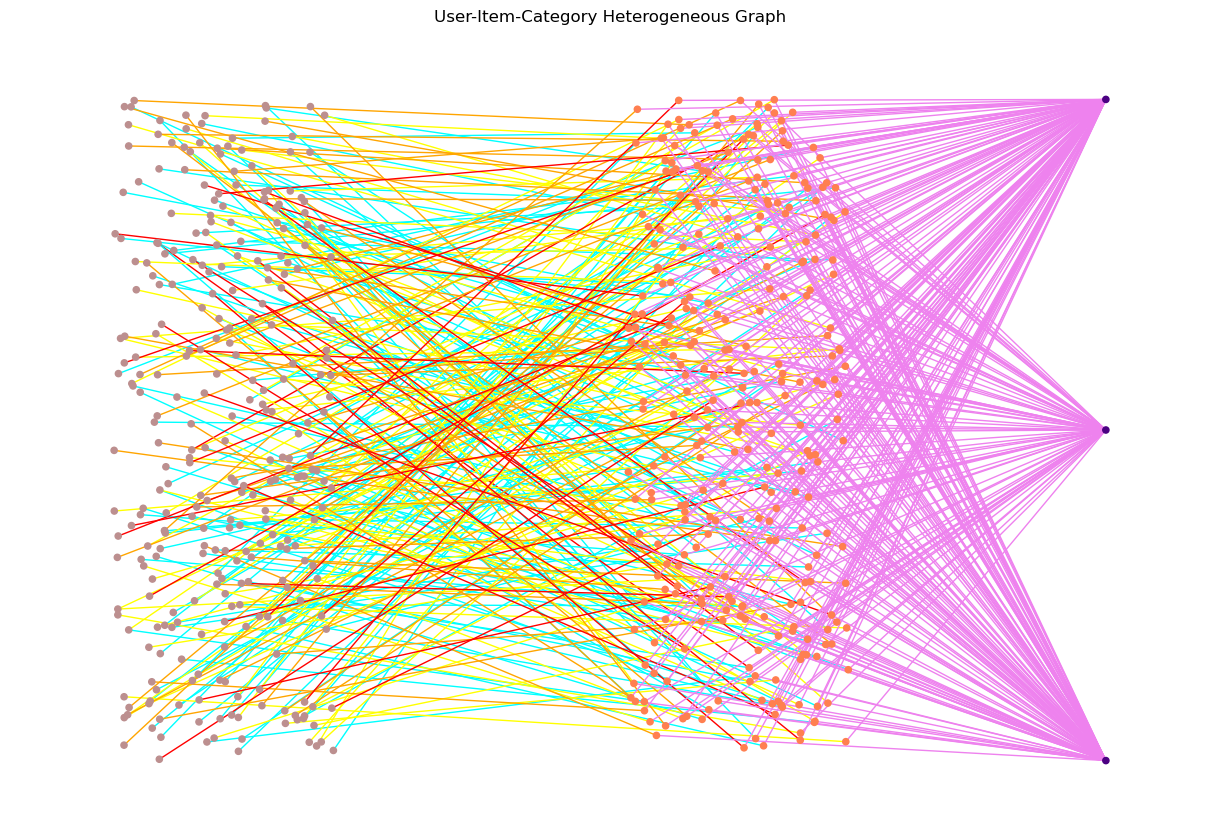

In [33]:
#示例图
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 创建图并添加节点
G = nx.Graph()

# 添加用户节点
for user in df_selected_final ['user_id'].unique():
    G.add_node(user, type='user')
    G.nodes[user]['color'] = 'rosybrown'

# 添加商品节点
for item in df_selected_final ['item_id'].unique():
    G.add_node(item, type='item')
    G.nodes[item]['color'] = 'coral'

# 添加商品类别节点
for category in top_3_item_categories:
    G.add_node(category, type='category')
    G.nodes[category]['color'] = 'indigo'

# 添加边，设置边的类型（行为）
for _, row in df_selected_final.iterrows():
    behavior = row['behavior']
    G.add_edge(row['user_id'], row['item_id'], edge_type=behavior)

# 添加 item -> item_category 边
for category in top_3_item_categories:
    category_items = df_selected_final [df_selected_final ['item_category'] == category]['item_id'].unique()
    for item in category_items:
        G.add_edge(item, category, edge_type='category_edge')

# 设置边类型和颜色映射
edge_color_mapping = {
    'buy': 'red',    # buy -> 红色
    'cart': 'orange',# cart -> 橙色
    'fav': 'yellow', # fav -> 黄色
    'pv': 'cyan',    # pv -> 青色
    'category_edge': 'violet' # category_edge -> 紫色
}

# 获取不同类型节点
user_nodes = [user for user in G.nodes if G.nodes[user]['type'] == 'user']
item_nodes = [item for item in G.nodes if G.nodes[item]['type'] == 'item']
category_nodes = [category for category in G.nodes if G.nodes[category]['type'] == 'category']

# 为每个节点类型分配不同的水平位置
user_pos = {user: (np.random.uniform(-0.5, -0.2), np.random.uniform(-1, 1)) for user in user_nodes}
item_pos = {item: (np.random.uniform(0.2, 0.5), np.random.uniform(-1, 1)) for item in item_nodes}
x_pos = 0.85  # 固定的 x 坐标（你可以根据需要调整）
y_positions = np.linspace(-1, 1, len(category_nodes))
category_pos = {
    category: (x_pos, y_positions[i])  # x 坐标相同，y 坐标均匀分布在 [-1, 1] 区间
    for i, category in enumerate(category_nodes)
}


# 合并所有节点的位置
pos = {}
pos.update(user_pos)
pos.update(item_pos)
pos.update(category_pos)

# 绘制图形
plt.figure(figsize=(12, 8))

# 获取节点颜色
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# 获取边颜色，按照边的类型映射颜色
edge_colors = [
    edge_color_mapping.get(G[u][v].get('edge_type', 'category_edge'), 'gray') for u, v in G.edges
]

# 绘制网络图（不显示标签）
nx.draw(G, pos, with_labels=False, node_size=20, font_size=6, node_color=node_colors, edge_color=edge_colors)

plt.title("User-Item-Category Heterogeneous Graph")
plt.savefig("/home/dongzhi/毕设/data/category_nodes_graph.png", dpi=300, bbox_inches='tight') 
plt.show()

训练集大小: 13785006
测试集大小: 60540


In [3]:
out_path = '/home/dongzhi/毕设/data/processed_data'
train_data.to_csv(f"{out_path}/train_data.csv", index=False)
test_data.to_csv(f"{out_path}/test_data.csv", index=False)

In [3]:
import pandas as pd
import torch
import dgl
import os

# 读取数据
file_path = "/home/dongzhi/毕设/data/processed_data/train_data.csv"
columns = ['user_id', 'item_id', 'item_category', 'behavior', 'timestamp']
data = pd.read_csv(file_path, header=None, names=columns)

# 存储路径
save_dir = "/home/dongzhi/毕设/data/processed_data/hetero_graphs_train"
os.makedirs(save_dir, exist_ok=True)

# 获取所有 item_category
categories = data['item_category'].unique()

# 创建一个字典来存储所有类别的异质图
category_graphs = {}

for category in categories:
    print(f"Processing category: {category}")
    
    # 过滤该类别的数据
    sub_data = data[data['item_category'] == category]

    # 重新编号用户和商品 ID，确保索引从 0 开始
    user_ids = sub_data['user_id'].unique()
    item_ids = sub_data['item_id'].unique()

    user_mapping = {id_: i for i, id_ in enumerate(sorted(user_ids))}
    item_mapping = {id_: i for i, id_ in enumerate(sorted(item_ids))}

    # 初始化图的边存储
    graph_data = {}

    # 遍历四种行为类型，创建不同类型的边
    for behavior_type in [1, 2, 3, 4]:
        behavior_data = sub_data[sub_data['behavior'] == behavior_type]
        print(behavior_data.head())

        if not behavior_data.empty:  # 确保这个行为类型的边存在
            edges_src = behavior_data['user_id'].map(user_mapping).dropna().astype(int).values
            edges_dst = behavior_data['item_id'].map(item_mapping).dropna().astype(int).values

            if len(edges_src) > 0 and len(edges_dst) > 0:
                edge_type = f"behavior_{behavior_type}"
                graph_data[('user', edge_type, 'item')] = (torch.tensor(edges_src, dtype=torch.int64), 
                                                           torch.tensor(edges_dst, dtype=torch.int64))

    # 创建 DGL 异质图
    if graph_data:
        hetero_graph = dgl.heterograph(graph_data)
        
        hetero_graph.nodes['user'].data['user_id'] = torch.tensor(list(user_mapping.keys()), dtype=torch.int64)
        hetero_graph.nodes['item'].data['item_id'] = torch.tensor(list(item_mapping.keys()), dtype=torch.int64)
        # 存储到字典
        category_graphs[category] = hetero_graph
        
        # 存储图数据
        save_path = os.path.join(save_dir, f"hetero_graph_{category}.pth")
        torch.save(hetero_graph, save_path)
        print(f"Graph for category {category} saved at {save_path}")
    else:
        print(f"Skipping category {category} due to no valid edges.")

# 额外存储索引映射（可选）
index_map_path = os.path.join(save_dir, "category_graphs.pth")
torch.save(category_graphs, index_map_path)
print(f"All graphs saved in dictionary format at {index_map_path}")

Processing category: 1320293
     user_id  item_id  item_category  behavior            timestamp
0         43   934647        1320293         1  2017-11-25 03:04:13
28        43  1856436        1320293         1  2017-12-02 06:20:58
32        43   934647        1320293         1  2017-11-25 03:04:13
55        43  1856436        1320293         1  2017-12-02 06:20:58
282      358  3169210        1320293         1  2017-11-29 04:44:25
      user_id  item_id  item_category  behavior            timestamp
1411     1561  2962455        1320293         2  2017-11-28 04:17:58
1439     1561  2962455        1320293         2  2017-11-28 04:17:58
1929     1982  1251420        1320293         2  2017-11-26 01:50:08
1960     1982  1251420        1320293         2  2017-11-26 01:50:08
1987     2028  3311605        1320293         2  2017-11-25 02:15:54
     user_id  item_id  item_category  behavior            timestamp
81        50  3408121        1320293         3  2017-12-01 06:31:29
108       50 

In [4]:
import pandas as pd
import torch
import dgl
import os

train_graphs_path = "/home/dongzhi/毕设/data/processed_data/hetero_graphs_train/category_graphs.pth"
#val_graphs_path="/home/dongzhi/毕设/data/processed_data/hetero_graphs_val/category_graphs.pth"
train_graphs = torch.load(train_graphs_path)
#val_graphs=torch.load(val_graphs_path)

print("所有商品类别:", list(train_graphs.keys()))
#print("所有商品类别:", list(val_graphs.keys()))

# 访问某个类别的图

 # 查看该类别的图

所有商品类别: [1320293, 4643350, 982926, 2735466, 3002561, 4690421, 4217906, 2885642, 1464116, 4756105, 3208959, 2520771, 64179, 1074254, 2465336, 1080785, 1471163, 486644, 4537973, 4074849, 3884119, 411153, 570735, 4993094, 4627820, 4050612, 3496816, 2667323, 3425094, 3117587, 2878148, 4357323, 133377, 3844144, 4602841, 4509358, 2355072, 4181361, 2342116, 2440115, 895939, 146830, 4086613, 3303026, 2572604, 4414464, 237446, 2106073, 1881956, 1449177, 3544014, 1231891, 1834026, 831271, 2422417, 5046132, 3500710, 4462359, 3848953, 2448593, 1104592, 4918438, 4082778, 4654786, 2926020, 2920476, 3607361, 801221, 4962280, 2640118, 3738615, 3004853, 2520377, 3065645, 4801426, 149192, 4921805, 1575622, 2739327, 3933554, 876318, 3407883, 4159072, 4145813, 1879194, 5053508, 1787510, 2056274, 4919077, 883960, 235534, 1928278, 4789432, 4583654, 1312642, 1530704, 941949, 4712571, 84264, 1902627, 2558204, 1548278, 3795317, 1573465, 154040, 2197032, 2025483, 3435808, 845650, 3619575, 2748804, 820597, 49836

In [5]:
from platform import node


graph_train=train_graphs[3607361]
#graph_val=val_graphs[2520377]
print(graph_train.nodes['user'])
#print(graph_val)

NodeSpace(data={'user_id': tensor([    317,     823,    1057,  ..., 1017293, 1017650, 1017861])})


In [6]:
edges_src, edges_dst = graph_train.edges(etype=('user', 'behavior_1', 'item'))

In [6]:
import numpy as np
import torch
import scipy.sparse as sp

def load_data_from_graph(train_edges, test_edges, num_users, num_items):
    """
    从 DGL Graph 的 edges 提取用户-物品交互数据，并转换为 UltraGCN 训练格式
    :param train_edges: 训练集 (edges_src, edges_dst)
    :param test_edges:  测试集 (edges_src, edges_dst)
    :param num_users:   用户数
    :param num_items:   物品数
    :return: train_data, test_data, train_mat, num_users, num_items, constraint_mat
    """

    # 获取 (user, item) 交互数据
    train_src, train_dst = train_edges  # 训练集 (user, item)
    test_src, test_dst = test_edges  # 测试集 (user, item)

    # 转换为 NumPy 数组
    train_src, train_dst = train_src.cpu().numpy(), train_dst.cpu().numpy()
    test_src, test_dst = test_src.cpu().numpy(), test_dst.cpu().numpy()

    # 统计最大用户和物品 ID，确保索引正确
    num_users = max(num_users, max(train_src.max(), test_src.max()) + 1)
    num_items = max(num_items, max(train_dst.max(), test_dst.max()) + 1)

    # 生成用户-物品交互字典
    train_data = [[train_src[i], train_dst[i]] for i in range(len(train_src))]
    test_data = [[test_src[i], test_dst[i]] for i in range(len(test_src))]

    # 构建稀疏交互矩阵 (user_num, item_num)
    train_mat = sp.dok_matrix((num_users, num_items), dtype=np.float32)
    for u, i in train_data:
        train_mat[u, i] = 1.0


    # 计算度矩阵（用于 UltraGCN 约束计算）
    items_D = np.sum(train_mat, axis=0).reshape(-1)  # 物品度数
    users_D = np.sum(train_mat, axis=1).reshape(-1)  # 用户度数

    print(items_D)
    print(users_D)

    beta_uD = np.where(users_D == 0, 0, np.sqrt(users_D + 1) / users_D).reshape(-1, 1)
    beta_iD = (1 / np.sqrt(items_D + 1)).reshape(1, -1)

    constraint_mat = {
        "beta_uD": torch.from_numpy(beta_uD).reshape(-1),
        "beta_iD": torch.from_numpy(beta_iD).reshape(-1)
    }

    return train_data, test_data, train_mat, num_users, num_items, constraint_mat


In [9]:
import torch
import dgl
from collections import defaultdict

def split_train_test(edges_src, edges_dst):
    """
    将每个用户的最后一个交互划分为测试集，其余作为训练集。
    
    :param edges_src: 用户ID列表（源节点）
    :param edges_dst: 物品ID列表（目标节点）
    :return: (train_edges, test_edges) 两个元组 (users, items)
    """

    user_interactions = defaultdict(list)

    # 遍历所有 (user, item) 交互，按用户存储
    for u, i in zip(edges_src.tolist(), edges_dst.tolist()):
        user_interactions[u].append(i)

    train_src, train_dst = [], []
    test_src, test_dst = [], []

    # 遍历每个用户的交互记录
    for user, items in user_interactions.items():
        if len(items) > 1:
            # 测试集：取最后一个交互
            test_src.append(user)
            test_dst.append(items[-1])

            # 训练集：剩下的交互
            train_src.extend([user] * (len(items) - 1))
            train_dst.extend(items[:-1])
        else:
            # 仅有一个交互的用户，全部放入训练集
            train_src.append(user)
            train_dst.append(items[0])

    # 转换为张量
    train_edges = (torch.tensor(train_src), torch.tensor(train_dst))
    test_edges = (torch.tensor(test_src), torch.tensor(test_dst))

    return train_edges, test_edges


In [17]:
train_edges, test_edges=split_train_test(edges_src, edges_dst)

In [18]:
train_data, test_data, train_mat, num_users, num_items, constraint_mat=load_data_from_graph(train_edges, test_edges,298797,37020)

[[ 39. 228.   6. ...   5.   8.  56.]]
[[3. 1. 1. ... 7. 1. 3.]]


/tmp/ipykernel_261032/1159567775.py:44: RuntimeWarning: divide by zero encountered in divide
  beta_uD = (np.sqrt(users_D + 1) / users_D).reshape(-1, 1)


In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.sparse import coo_matrix

# 读取数据
def load_data(file_path):
    df = pd.read_csv(file_path, header=None, names=['user', 'item', 'category', 'action', 'timestamp'])
    df = df[df['action'].isin([1, 2, 3, 4])]  # 过滤掉异常值
    df['action'] = df['action'].astype(int)  # 确保 action 为整数
    return df

# 构建索引
def build_index(df):
    user_ids = sorted(df['user'].unique())
    item_ids = sorted(df['item'].unique())
    categories = sorted(df['category'].unique())
    
    user_index = {uid: i for i, uid in enumerate(user_ids)}
    item_index = {iid: i for i, iid in enumerate(item_ids)}
    category_index = {cid: i for i, cid in enumerate(categories)}
    
    print("User Index Sample:", list(user_index.items())[:10])  # 调试输出
    print("Item Index Sample:", list(item_index.items())[:10])
    print("Category Index Sample:", list(category_index.items())[:10])
    
    return user_index, item_index, category_index

# 构建邻接矩阵
def build_adjacency_matrices(df, user_index, item_index, category_index):
    num_users = len(user_index)
    num_items = len(item_index)
    num_categories = len(category_index)
    num_actions = 4  # 直接用 1, 2, 3, 4 作为索引
    
    # 初始化稀疏矩阵存储
    user_item_matrices = {a: defaultdict(int) for a in range(num_actions)}
    user_category_matrices = {a: defaultdict(int) for a in range(num_actions)}
    
    for _, row in df.iterrows():
        u, i, c, a = row['user'], row['item'], row['category'], row['action']
        
        if u not in user_index:
            print(f"Unexpected user ID: {u}")
            continue
        if i not in item_index:
            print(f"Unexpected item ID: {i}")
            continue
        if c not in category_index:
            print(f"Unexpected category ID: {c}")
            continue
        
        a_idx = a - 1  # 直接用 1, 2, 3, 4 - 1 作为索引
        u_idx, i_idx, c_idx = user_index[u], item_index[i], category_index[c]
        
        # 记录用户-商品交互
        user_item_matrices[a_idx][(u_idx, i_idx)] += 1
        
        # 记录用户-商品类别交互
        user_category_matrices[a_idx][(u_idx, c_idx)] += 1
    
    # 转换为稀疏矩阵
    user_item_sparse = {a: coo_matrix((list(mat.values()), zip(*mat.keys())), shape=(num_users, num_items)) for a, mat in user_item_matrices.items()}
    user_category_sparse = {a: coo_matrix((list(mat.values()), zip(*mat.keys())), shape=(num_users, num_categories)) for a, mat in user_category_matrices.items()}
    
    return user_item_sparse, user_category_sparse

# 主函数
def main(file_path):
    df = load_data(file_path)
    user_index, item_index, category_index = build_index(df)
    user_item_sparse, user_category_sparse = build_adjacency_matrices(df, user_index, item_index, category_index)
    return user_item_sparse, user_category_sparse

# 示例调用
# file_path = "data.csv"  # 替换为你的数据文件路径
# user_item_matrices, user_category_matrices = main(file_path)
# print(user_item_matrices)
# print(user_category_matrices)




# 示例调用
file_path = "/home/dongzhi/毕设/data/processed_data/train_data.csv"  # 替换为你的数据文件路径
user_item_matrices, user_category_matrices = main(file_path)
print(user_item_matrices)
print(user_category_matrices)


User Index Sample: [(43, 0), (50, 1), (116, 2), (245, 3), (317, 4), (358, 5), (438, 6), (536, 7), (623, 8), (650, 9)]
Item Index Sample: [(28, 0), (72, 1), (81, 2), (97, 3), (116, 4), (142, 5), (154, 6), (207, 7), (214, 8), (284, 9)]
Category Index Sample: [(2171, 0), (2410, 1), (4907, 2), (5064, 3), (6991, 4), (7769, 5), (8109, 6), (8254, 7), (8409, 8), (9874, 9)]
{0: <19355x213824 sparse matrix of type '<class 'numpy.int64'>'
	with 246850 stored elements in COOrdinate format>, 1: <19355x213824 sparse matrix of type '<class 'numpy.int64'>'
	with 139896 stored elements in COOrdinate format>, 2: <19355x213824 sparse matrix of type '<class 'numpy.int64'>'
	with 134955 stored elements in COOrdinate format>, 3: <19355x213824 sparse matrix of type '<class 'numpy.int64'>'
	with 68218 stored elements in COOrdinate format>}
{0: <19355x4298 sparse matrix of type '<class 'numpy.int64'>'
	with 174910 stored elements in COOrdinate format>, 1: <19355x4298 sparse matrix of type '<class 'numpy.int64'

In [5]:
import numpy as np
import scipy.sparse as sp
import torch
from torch_geometric.data import Data
weights = [0.1, 0.2, 0.3, 0.4]

# 加权求和并转换为稀疏格式
weighted_sum = sum(weights[i] * user_category_matrices[i] for i in range(4))
weighted_sum = sp.coo_matrix(weighted_sum)  # 确保结果是稀疏矩阵

# 将稀疏矩阵转换为PyTorch张量
edge_index = torch.tensor(np.vstack((weighted_sum.row, weighted_sum.col)), dtype=torch.long)
edge_weight = torch.tensor(weighted_sum.data, dtype=torch.float)

# 创建图数据
data = Data(edge_index=edge_index, edge_attr=edge_weight, num_nodes=weighted_sum.shape[0])
num_users = 19355
num_items = 4298


In [ ]:
import numpy as np
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv, BatchNorm
from torch_geometric.data import Data
# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")



# 假设您已经有了这四个稀疏矩阵
weights = [0.1, 0.2, 0.3, 0.4]

# 加权求和并转换为稀疏格式
weighted_sum = sum(weights[i] * user_category_matrices[i] for i in range(4))
weighted_sum = sp.coo_matrix(weighted_sum)  # 确保结果是稀疏矩阵

# 将稀疏矩阵转换为PyTorch张量
edge_index = torch.tensor(np.vstack((weighted_sum.row, weighted_sum.col)), dtype=torch.long)
edge_weight = torch.tensor(weighted_sum.data, dtype=torch.float)


# 创建图数据
num_users = 19355
num_items = 4298
data = Data(edge_index=edge_index, edge_attr=edge_weight, num_nodes=num_users + num_items)

# 定义GCNEmbedding类
class GCNEmbedding(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEmbedding, self).__init__()
        self.conv1 = GCNConv(in_channels, 64)
        self.bn1 = BatchNorm(64, track_running_stats=False)
        self.conv2 = GCNConv(64, out_channels)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_weight)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# 初始化节点特征（假设为单位矩阵）
data.x = torch.eye(num_users + num_items, dtype=torch.float)


# 将模型移到 GPU（如果可用）
model = GCNEmbedding(in_channels=num_users + num_items, out_channels=16).to(device)

# 将图数据移到 GPU（如果可用）
data = data.to(device)
# 定义BPRLoss类
class BPRLoss(nn.Module):
    def __init__(self):
        super(BPRLoss, self).__init__()

    def forward(self, pos_scores, neg_scores):
        return -torch.mean(torch.log(torch.sigmoid(pos_scores - neg_scores)))
    
def sample_negative_edges(num_samples, num_users, num_items, pos_edges_set):
    neg_samples = []
    
    # 遍历正样本并为每个正样本采样负样本
    for _ in range(num_samples):
        # 随机选择一个正样本
        u, i = list(pos_edges_set)[np.random.randint(0, len(pos_edges_set))]

        # 获取该用户与之交互的商品集合
        interacted_items = {item for (user, item) in pos_edges_set if user == u}

        # 从该用户未与之交互的商品中采样
        all_items = set(range(num_users, num_users + num_items))
        non_interacted_items = all_items - interacted_items
        neg_item = np.random.choice(list(non_interacted_items))  # 随机选择一个未交互的商品
        
        neg_samples.append((u, neg_item))
    
    # 转换为torch张量
    neg_samples = np.array(neg_samples)
    return torch.tensor(neg_samples, dtype=torch.long)  # 保证输出为 torch 张量

# 训练函数
# 修改训练函数，确保数据和张量都在同一设备上
def train_gcn(model, data, num_users, num_items, epochs=1000):
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    bpr_loss = BPRLoss()

    # 获取所有正样本对
    pos_edges = data.edge_index.T  # 直接使用 torch 张量

    # 使用集合存储正样本，提高查询速度
    pos_edges_set = set(map(tuple, pos_edges.cpu().numpy()))  # 先移动到 CPU 再转换为 set

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        embeddings = model(data)

        # 采样正负样本
        pos_indices = np.random.choice(len(pos_edges), 1024, replace=False)
        pos_samples = pos_edges[pos_indices]
        user_indices = pos_samples[:, 0]
        pos_item_indices = pos_samples[:, 1]

        # 将索引移到 GPU（如果需要）
        user_indices = torch.tensor(user_indices, dtype=torch.long).to(device)
        pos_item_indices = torch.tensor(pos_item_indices, dtype=torch.long).to(device)

        # 采样负样本
        neg_samples = sample_negative_edges(1024, num_users, num_items, pos_edges_set)
        neg_item_indices = neg_samples[:, 1].to(device)  # 将负样本移到 GPU

        # 计算正负样本对的得分
        pos_scores = (embeddings[user_indices] * embeddings[pos_item_indices]).sum(dim=1)
        neg_scores = (embeddings[user_indices] * embeddings[neg_item_indices]).sum(dim=1)

        # 数值稳定性处理
        pos_scores = torch.clamp(pos_scores, min=-10, max=10)
        neg_scores = torch.clamp(neg_scores, min=-10, max=10)

        # 计算损失
        loss = bpr_loss(pos_scores, neg_scores)
        loss.backward()

        # 梯度裁剪
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    print("训练完成，用户嵌入和商品种类嵌入已生成。")

# 进行训练
train_gcn(model, data, num_users, num_items)

使用设备: cuda


/tmp/ipykernel_1477997/272088344.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  user_indices = torch.tensor(user_indices, dtype=torch.long).to(device)
/tmp/ipykernel_1477997/272088344.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_item_indices = torch.tensor(pos_item_indices, dtype=torch.long).to(device)


Epoch 0, Loss: 0.329344242811203


In [91]:
model.eval()
with torch.no_grad():
    embeddings = model(data)

# 打印用户嵌入
print("用户嵌入：")
print(embeddings[:num_users])

# 打印商品种类嵌入
print("商品种类嵌入：")
print(embeddings[num_users:])

用户嵌入：
torch.Size([19355, 16])
商品种类嵌入：
tensor([[ 0.4357,  0.4814, -0.4610,  ...,  0.4730, -0.7658, -0.4694],
        [ 0.4369,  0.4805, -0.4612,  ...,  0.4748, -0.7670, -0.4693],
        [ 0.4368,  0.4802, -0.4612,  ...,  0.4747, -0.7669, -0.4691],
        ...,
        [ 0.3981,  0.4457, -0.4106,  ...,  0.4160, -0.7019, -0.4212],
        [ 0.4369,  0.4805, -0.4612,  ...,  0.4748, -0.7670, -0.4693],
        [ 0.3095,  0.3616, -0.3463,  ...,  0.3526, -0.6032, -0.3524]])


In [92]:
with torch.no_grad():
    embeddings = model(data)

# 将嵌入存储到文件中
torch.save(embeddings, 'embeddings.pt')

print("嵌入已保存到文件 'embeddings.pt'")

嵌入已保存到文件 'embeddings.pt'


In [7]:
import pandas as pd

test_file = "/home/dongzhi/毕设/model/mine/mine_data/pv/test_behavior_1.txt"
df = pd.read_csv(test_file, sep=" ", header=None)
print(df.head())
print("数据前几行：")
print(df.head())  # 打印前几行数据
print("测试集列名：", df.columns)  # 打印列名

# 直接使用列索引访问数据
if df.shape[1] > 1:
    print("测试集中唯一用户数：", df[0].nunique())  # 用户列
    print("测试集中唯一物品数：", df[1].nunique())  # 物品列
else:
    print("数据格式可能有问题，请检查文件是否是以TAB分隔的")

   0       1
0  0  146252
1  1   90579
2  2   14607
3  3  178844
4  4    4457
数据前几行：
   0       1
0  0  146252
1  1   90579
2  2   14607
3  3  178844
4  4    4457
测试集列名： Index([0, 1], dtype='int64')
测试集中唯一用户数： 19355
测试集中唯一物品数： 17589
